In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [53]:
articles_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions_train_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

# Customer Meta Data

Lets see how the data in customer dataframe looks like

In [4]:
print(f"Number of rows in customers is {customers_df.shape[0]}")
print(f"Number of columns in customers is {customers_df.shape[1]}")
print("\nInformation of Customers:")
customers_df.info()

Number of rows in customers is 1371980
Number of columns in customers is 7

Information of Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [5]:
#lets see first 5 rows of customer dataframe
customers_df.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## Exploratory Data Analysis

* Summary Statistics
* Identify the key
* Check for missing values
* Check for duplicates
* Identify categorical distributions
* Identify numerical distributions

In [6]:
print("Summary Statistics")
customers_df.describe()

Summary Statistics


,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [7]:
#Checking if customer_id is unique identifier in table
customers_df.customer_id.nunique()==customers_df.shape[0]

True

In [8]:
#Looking for null values?
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

In [9]:
#percentage of null values in each column
customers_df.isnull().mean()*100

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

In [10]:
#Check for Duplicate values
customers_duplicates_df = customers_df[customers_df.duplicated()]
customers_duplicates_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code


In [11]:
#Identify categorical distributions
cat_column_names = [ column for column in customers_df.columns if customers_df[column].dtype=="object" ]
cat_column_names

['customer_id', 'club_member_status', 'fashion_news_frequency', 'postal_code']

In [12]:
#we can remove customer_id from categories as it is key
cat_column_names.remove('customer_id')
cat_column_names

['club_member_status', 'fashion_news_frequency', 'postal_code']

club_member_status has 3 categories
Distinct categories in club_member_status: ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']


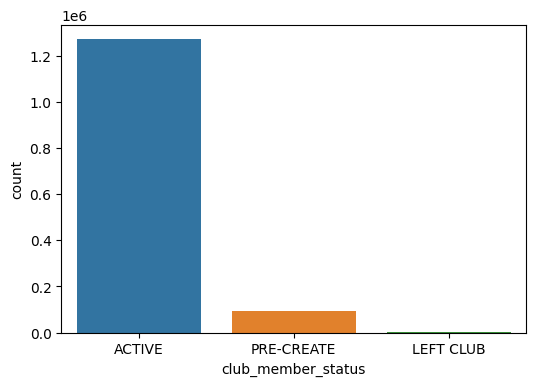

fashion_news_frequency has 3 categories
Distinct categories in fashion_news_frequency: ['NONE' 'Regularly' nan 'Monthly']


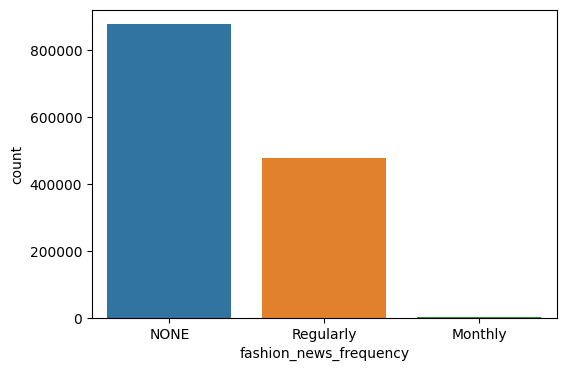

postal_code has 352899 categories


In [13]:
#lets check category types in each category and the data distribution in each category
for col in cat_column_names:
    print(f"{col} has {customers_df[col].nunique()} categories")
    if customers_df[col].nunique()<10:
        print(f"Distinct categories in {col}: {customers_df[col].unique()}")
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=customers_df)
        plt.show()       

In [14]:
#Identify Numerical distributions
num_column_names = [column for column in customers_df.columns if customers_df[column].dtype=="float64"]
num_column_names

['FN', 'Active', 'age']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


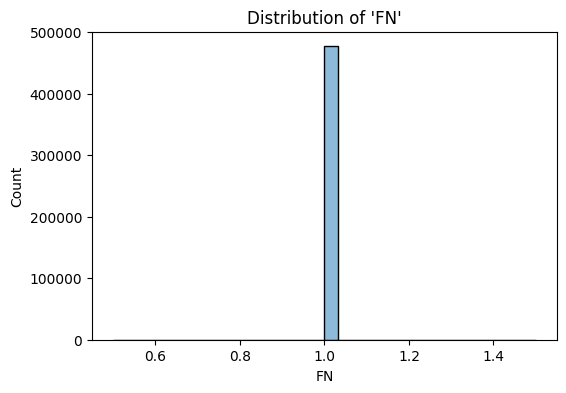

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


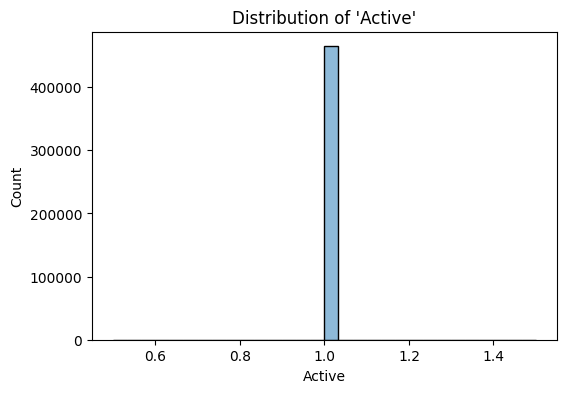

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


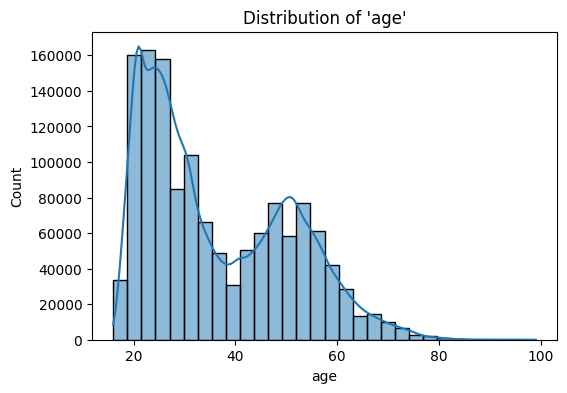

In [15]:
for column in num_column_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(customers_df[column], kde=True, bins=30)
    
    # Add title and labels
    plt.title(f"Distribution of '{column}'")
    #plt.xlabel(column)
    #plt.ylabel('Frequency')
    
    # Show plot
    plt.show()

In [16]:
#Trying to undrestand the unique values of FN and Active columns
customers_df['FN'].unique(), customers_df['Active'].unique()

(array([nan,  1.]), array([nan,  1.]))

In [17]:
#Handling Missing values
#so the unique values in both Active and FN are 1 or Nan. Assuming the missing values are not active customers, we can impute them with '0'
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [18]:
customers_df['FN'].isna().sum(), customers_df['Active'].isna().sum()

(0, 0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


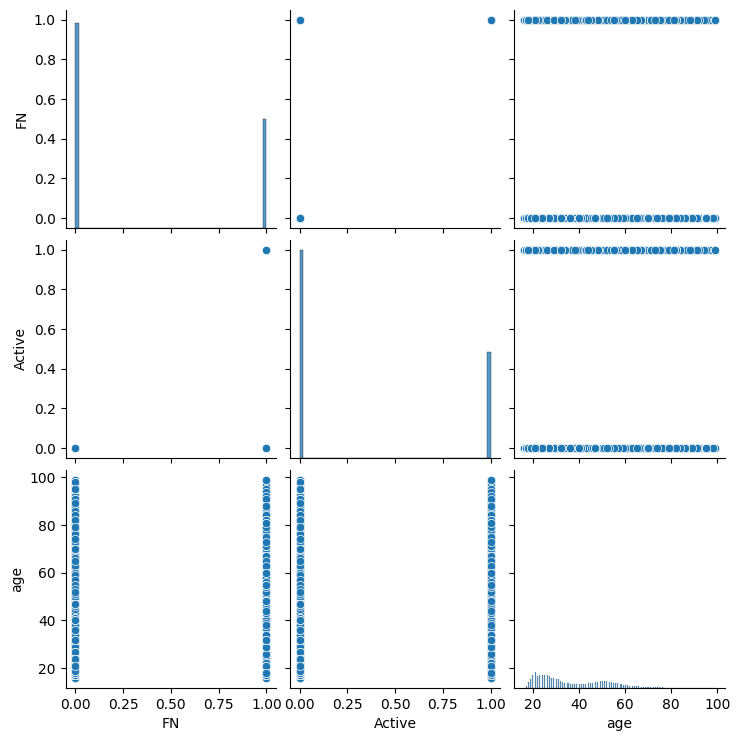

In [19]:
sns.pairplot(customers_df)

#### Lets do bivariant analysis

<Axes: xlabel='Active', ylabel='count'>

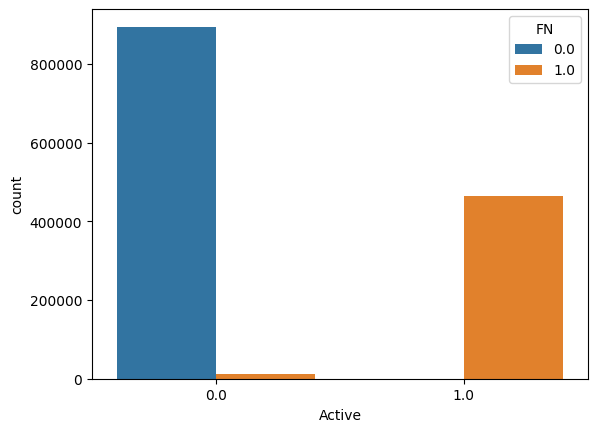

In [20]:
sns.countplot(customers_df, x = "Active", hue = "FN" )

<Axes: xlabel='FN', ylabel='count'>

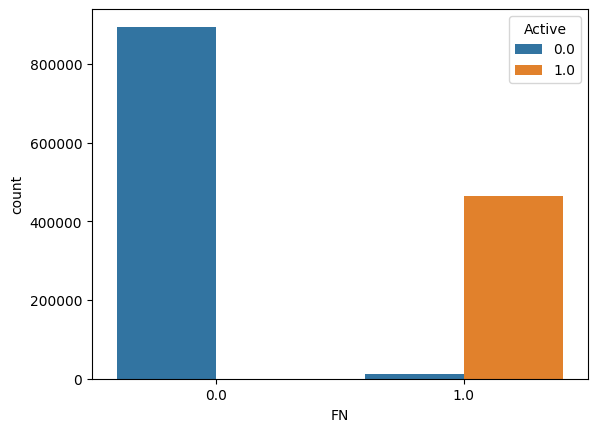

In [21]:
sns.countplot(customers_df, x = "FN", hue = "Active")

From the above two graphs we can see that FN and active are highly correlated

<Axes: xlabel='fashion_news_frequency', ylabel='count'>

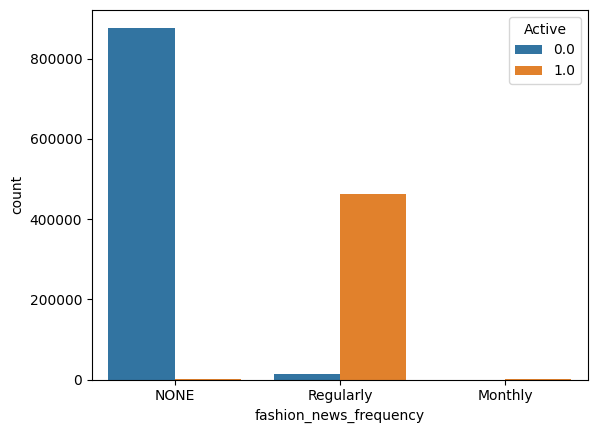

In [22]:
sns.countplot(customers_df, x = "fashion_news_frequency", hue = "Active" )   

<Axes: xlabel='fashion_news_frequency', ylabel='count'>

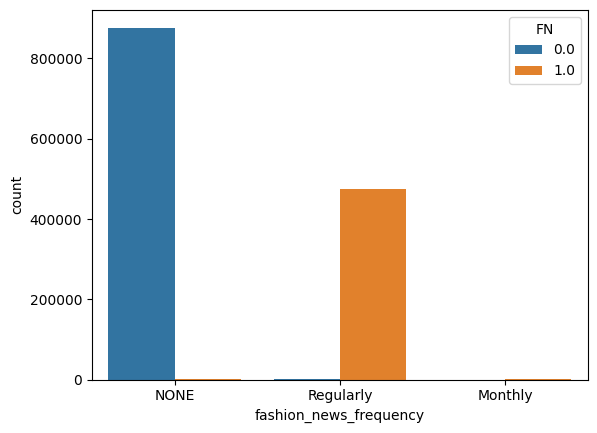

In [23]:
sns.countplot(customers_df, x = "fashion_news_frequency", hue = "FN" )  

<Axes: xlabel='club_member_status', ylabel='count'>

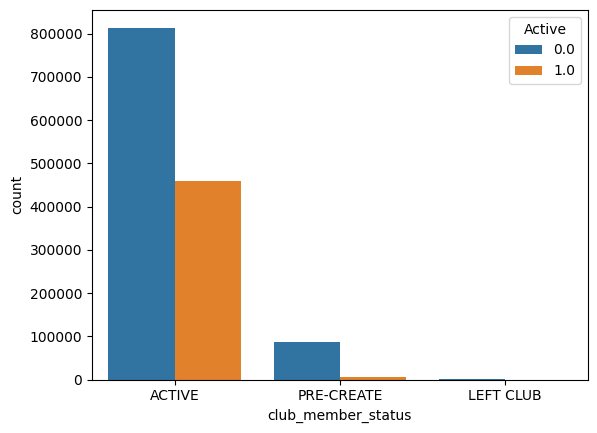

In [24]:
sns.countplot(customers_df, x = "club_member_status", hue = "Active" )   

In [25]:
#we need to handle missing values for columns "club_member_status" and "fashion_news_frequency"
#As we don't have information on category they belong to lets replace the missing values with "UNKNOWN"
customers_df["club_member_status"] = customers_df["club_member_status"].fillna("UNKNOWN")
customers_df["fashion_news_frequency"] = customers_df["fashion_news_frequency"].fillna("UNKNOWN")

<Axes: xlabel='fashion_news_frequency', ylabel='count'>

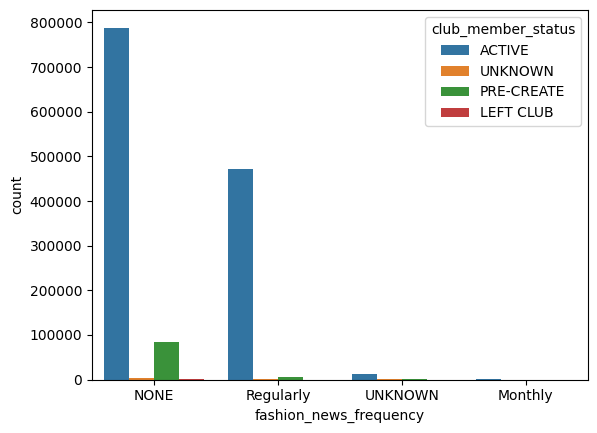

In [26]:
sns.countplot(customers_df, x = "fashion_news_frequency", hue = "club_member_status")

<Axes: xlabel='fashion_news_frequency', ylabel='count'>

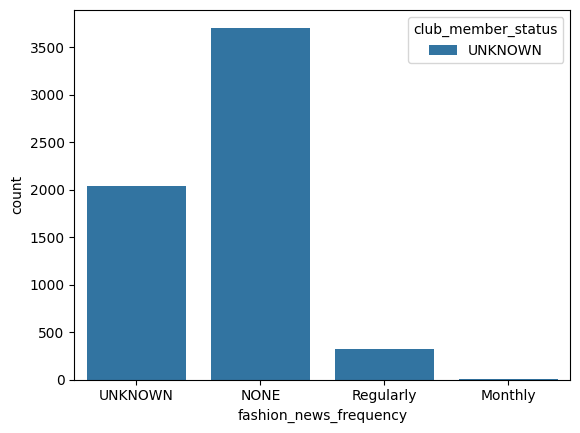

In [27]:
#lets focus on knowing the fashion new frequency for customers whose club_member_status is unknown
sns.countplot(customers_df[customers_df["club_member_status"]=="UNKNOWN"], x = "fashion_news_frequency", hue = "club_member_status")

In [28]:
#Age Analysis
customers_df["age"].min(), customers_df["age"].max()

(16.0, 99.0)

In [29]:
customers_df["age"].isna().sum()

15861

lets impute nan with mean values

In [30]:
mean_age = round(customers_df["age"].mean())
mean_age

36

In [31]:
#customers_df["age"].fillna(mean_age, inplace = True)
customers_df.fillna({"age": mean_age}, inplace=True)
customers_df["age"].isna().sum()

0

Though Age is a numerical column we can convert that into categorical column by making groups. Categories we are going to consider are:
* 0-20
* 20-40
* 40-60
* 60-80
* 80-100

In [32]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
#customers_df["age"] = pd.cut(customers_df["age"], 5)
customers_df["age"] = pd.cut(customers_df["age"] , bins = bins, labels = labels, right = False )

In [33]:
customers_df["age"].unique()

['40-60', '20-40', '60-80', '0-20', '80-100']
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100']

In [34]:
#we are trying to change Age Data type to object, similar to other categorical columns
#customers_df["age"] = customers_df["age"].astype(str)
#lets fill Nan in age to "UNKNOWN"
#customers_df["age"] = customers_df["age"].fillna("UNKNOWN")

In [35]:
customers_df.isnull().mean()*100

customer_id               0.0
FN                        0.0
Active                    0.0
club_member_status        0.0
fashion_news_frequency    0.0
age                       0.0
postal_code               0.0
dtype: float64

There by we have imputed all missing values in customers_df

In [36]:
#As we might not be using postal code in our prediction dropping postal code column
customers_df = customers_df.drop(columns = "postal_code")

In [37]:
cust_df = customers_df[["customer_id","age"]]
cust_df.head()

,customer_id,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,20-40
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,20-40
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,40-60
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,40-60


In [38]:
#lets do dummy encoding of our categorical columns now
customers_df = pd.get_dummies(customers_df, columns=["club_member_status", "fashion_news_frequency", "age"], drop_first = False)

In [39]:
customers_df.head()

,customer_id,FN,Active,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,club_member_status_UNKNOWN,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly,fashion_news_frequency_UNKNOWN,age_0-20,age_20-40,age_40-60,age_60-80,age_80-100
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,True,False,False,False,False,True,False,False,False,False,True,False,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,True,False,False,False,False,True,False,False,False,True,False,False,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,True,False,False,False,False,True,False,False,False,True,False,False,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,True,False,False,False,False,True,False,False,False,False,True,False,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,True,False,False,False,False,False,True,False,False,False,True,False,False


In [40]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status_ACTIVE',
       'club_member_status_LEFT CLUB', 'club_member_status_PRE-CREATE',
       'club_member_status_UNKNOWN', 'fashion_news_frequency_Monthly',
       'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly',
       'fashion_news_frequency_UNKNOWN', 'age_0-20', 'age_20-40', 'age_40-60',
       'age_60-80', 'age_80-100'],
      dtype='object')

In [41]:
selected_columns = ['FN', 'Active', 'club_member_status_ACTIVE',
       'club_member_status_LEFT CLUB', 'club_member_status_PRE-CREATE',
       'club_member_status_UNKNOWN', 'fashion_news_frequency_Monthly',
       'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly',
       'fashion_news_frequency_UNKNOWN', 'age_0-20', 'age_20-40', 'age_40-60',
       'age_60-80', 'age_80-100']

<Axes: >

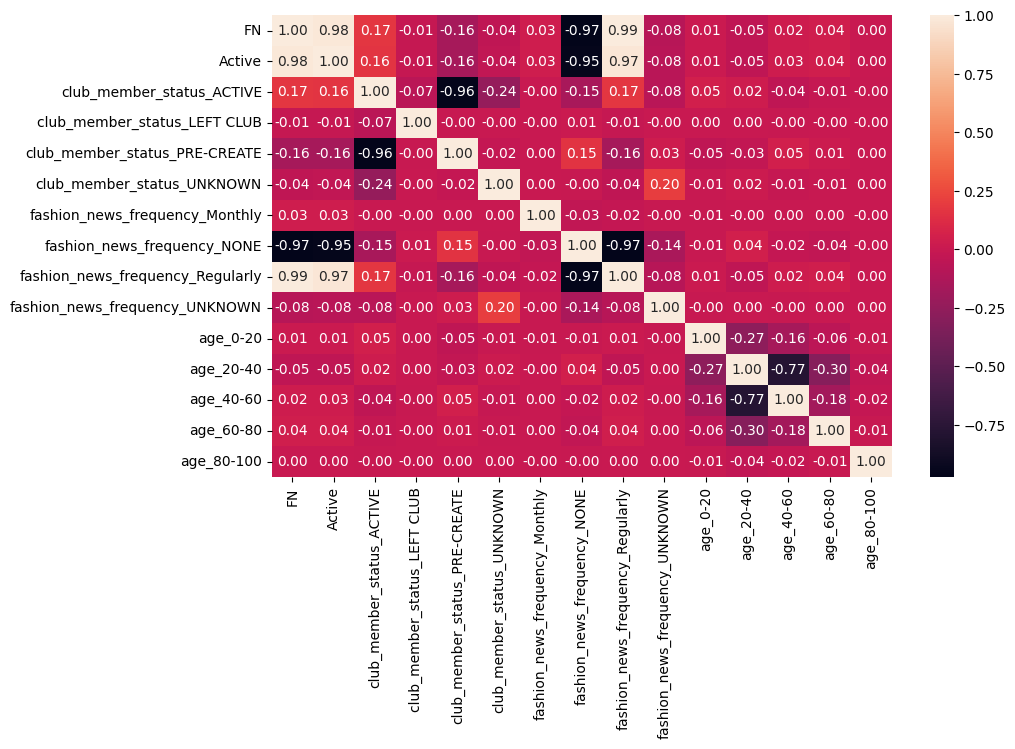

In [42]:
correlation_matrix =  customers_df[selected_columns].corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, fmt = "0.2f")

# Transaction Data

Lets see how the data in transactions dataframe looks like

In [56]:
print(f"Number of rows in transactions is {transactions_train_df.shape[0]}")
print(f"Number of columns in transactions is {transactions_train_df.shape[1]}")
print("\nInformation of transactions:")
transactions_train_df.info()

Number of rows in transactions is 31788324
Number of columns in transactions is 5

Information of transactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [44]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [46]:
#lets look at the statistics
transactions_train_df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


## Exploratory Data Analysis

In [47]:
#lets check for null values
transactions_train_df.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [48]:
#Check for Duplicate values
transactions_train_df.duplicated().sum()

2974905

In [50]:
#lets look at duplicate values
trans_duplicates = transactions_train_df[transactions_train_df.duplicated(keep = False)]
trans_duplicates.head()

,t_dat,customer_id,article_id,price,sales_channel_id
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
19,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2


customer can order 2 articles together which can showup as duplicate values. we need to not remove them. Instead they help in identifying the article they like the most.

In [51]:
#print(f"Number of rows before dropping duplicates from transactions dataframe is {transactions_train_df.shape[0]}")
#by default drop_duplicates drop duplicates except for the firsdt occurrence
#transactions_train_df = transactions_train_df.drop_duplicates()

Number of rows before dropping duplicates from transactions dataframe is 31788324


In [52]:
#print(f"Number of rows after dropping duplicates from transactions dataframe is {transactions_train_df.shape[0]}")

Number of rows after dropping duplicates from transactions dataframe is 28813419


In [48]:
#Lets look at categorical distribution of sales_channel_id
transactions_train_df["sales_channel_id"].unique()

array([2, 1])

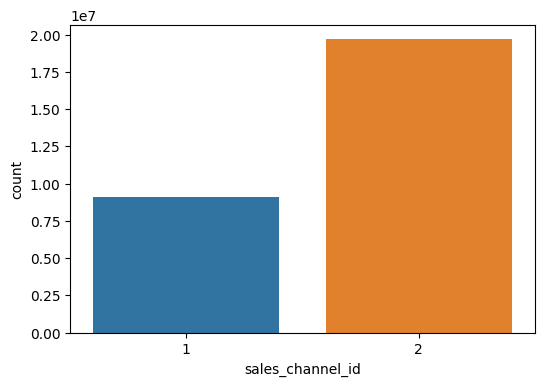

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x = "sales_channel_id", data = transactions_train_df)
plt.show()

In [50]:
#converting t_dat from "object" type to "datetime" type
transactions_train_df["t_dat"] = pd.to_datetime(transactions_train_df['t_dat'])

In [51]:
transactions_train_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [52]:
trans_date_min = transactions_train_df["t_dat"].min()
trans_date_max = transactions_train_df["t_dat"].max()
unique_dates_count = transactions_train_df["t_dat"].nunique()
print(f"Date range for transactions data is from {trans_date_min} to  {trans_date_max} with a total duration of {unique_dates_count} ")

Date range for transactions data is from 2018-09-20 00:00:00 to  2020-09-22 00:00:00 with a total duration of 734 


In [53]:
transactions_train_df["article_id"].nunique()

104547

In [54]:
transactions_train_df["customer_id"].nunique()

1362281

# Articles Data

Lets see how the data in Articles dataframe looks like

In [55]:
print(f"Number of rows in articles is {articles_df.shape[0]}")
print(f"Number of columns in articles is {articles_df.shape[1]}")
print("\nInformation of articles:")
articles_df.info()

Number of rows in articles is 105542
Number of columns in articles is 25

Information of articles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_v

In [56]:
#lets see first 5 rows of articles dataframe
articles_df.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Exploratory Data Analysis

In [57]:
print("Summary Statistics")
articles_df.describe()

Summary Statistics


,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [58]:
#lets check for missing values in articles dataframe
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

It means there are missing values only in detail_desc column. Lets replace missing values with "UNKNOWN" for detail_desc.

In [59]:
articles_df["detail_desc"] = articles_df["detail_desc"].fillna("UNKNOWN")
articles_df.isnull().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

All missing values were taken care. Now let's check for duplicates.

In [60]:
dup_articles = articles_df[articles_df.duplicated()]
dup_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


So we dont have duplicxates in articles_df.
Now lets check for categorical and numerical distributions.

In [61]:
#Identifying Categorical Columns
categorical_columns = [ col for col in articles_df.columns if articles_df[col].dtype=="object"]
categorical_columns

['prod_name',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_name',
 'colour_group_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',
 'department_name',
 'index_code',
 'index_name',
 'index_group_name',
 'section_name',
 'garment_group_name',
 'detail_desc']

prod_name has 45875 categories
product_type_name has 131 categories
product_group_name has 19 categories


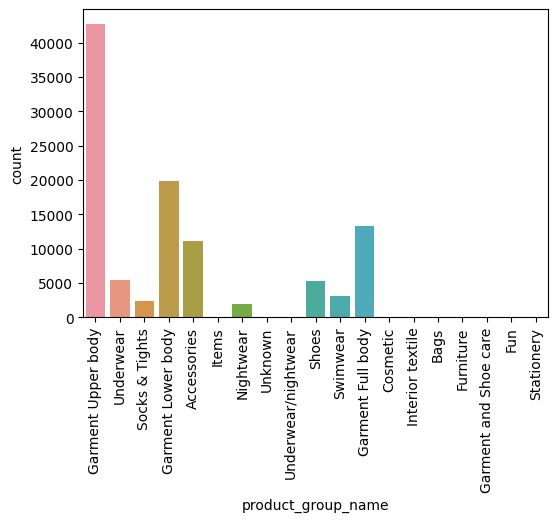

graphical_appearance_name has 30 categories
colour_group_name has 50 categories
perceived_colour_value_name has 8 categories


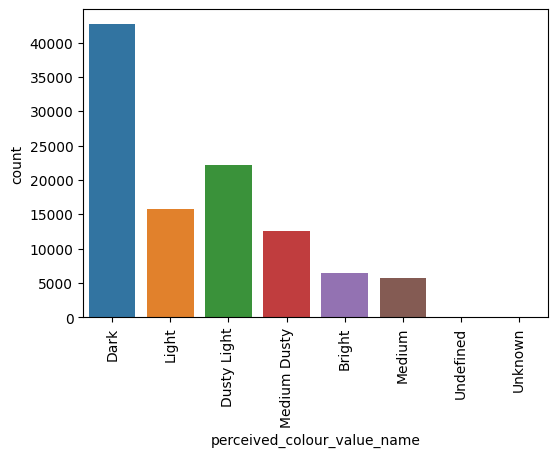

perceived_colour_master_name has 20 categories


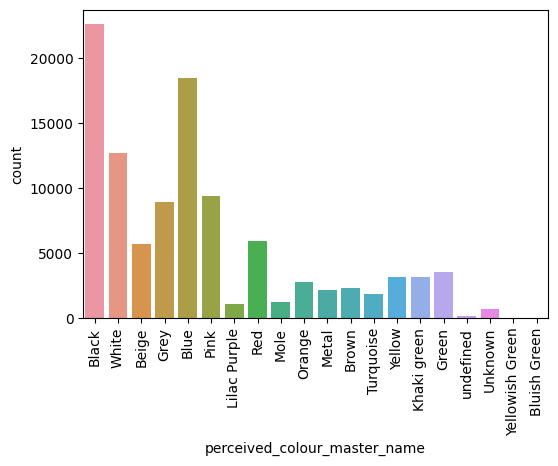

department_name has 250 categories
index_code has 10 categories


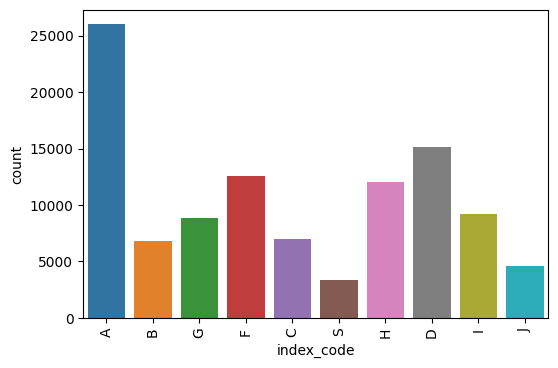

index_name has 10 categories


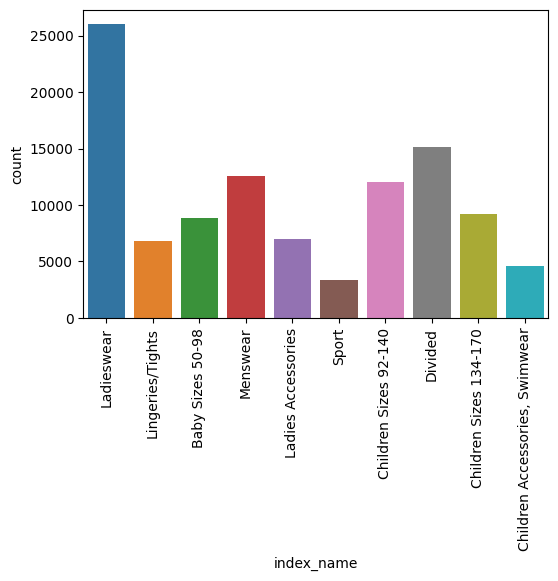

index_group_name has 5 categories


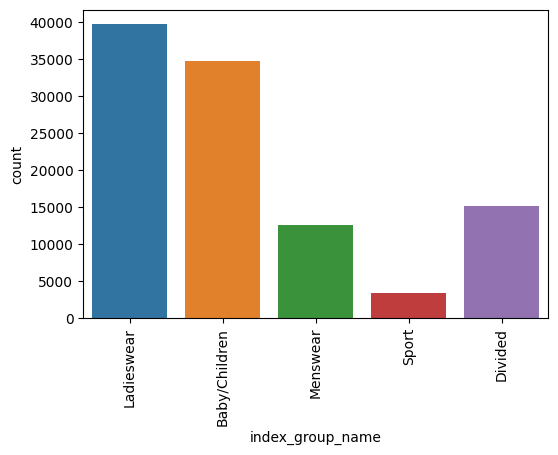

section_name has 56 categories
garment_group_name has 21 categories
detail_desc has 43405 categories


In [62]:
#Categorical Distributions
for col in categorical_columns:
    print(f"{col} has {articles_df[col].nunique()} categories")
    if articles_df[col].nunique()<=20:
        plt.figure(figsize=(6,4))
        sns.countplot(x = col, data = articles_df )
        plt.xticks(rotation=90)
        plt.show()

By observing the distributions, we can say that the index_name and index_code represent the same thing.
<p>Lets look in more detail about product groups data distribution </p>

In [63]:
#lets group articles by product group name and check unique product types in each product group.
articles_product_grp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
articles_product_grp

product_group_name
Accessories              38
Bags                      6
Cosmetic                  2
Fun                       1
Furniture                 1
Garment Full body         6
Garment Lower body        5
Garment Upper body       15
Garment and Shoe care     6
Interior textile          3
Items                     5
Nightwear                 4
Shoes                    16
Socks & Tights            3
Stationery                1
Swimwear                  6
Underwear                11
Underwear/nightwear       2
Unknown                   1
Name: product_type_name, dtype: int64

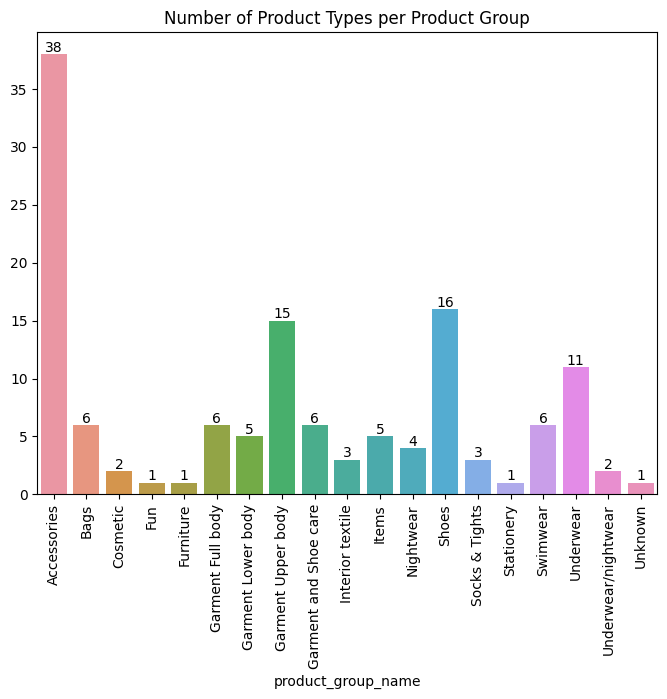

In [64]:
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per Product Group')
sns.barplot(x = articles_product_grp.index, y= articles_product_grp.values)
plt.xticks(rotation=90)
# Add count labels on top of each bar
for i, value in enumerate(articles_product_grp.values):
    plt.text(i, value + 0.2, f'{int(value)}', ha='center')  # Adjust '0.1' for spacing as needed
plt.show()

In [65]:
#lets group articles by product group name and check unique articles in each product group.
articles_product_grp_art = articles_df.groupby(["product_group_name"])["article_id"].nunique()
articles_product_grp_art

product_group_name
Accessories              11158
Bags                        25
Cosmetic                    49
Fun                          2
Furniture                   13
Garment Full body        13292
Garment Lower body       19812
Garment Upper body       42741
Garment and Shoe care        9
Interior textile             3
Items                       17
Nightwear                 1899
Shoes                     5283
Socks & Tights            2442
Stationery                   5
Swimwear                  3127
Underwear                 5490
Underwear/nightwear         54
Unknown                    121
Name: article_id, dtype: int64

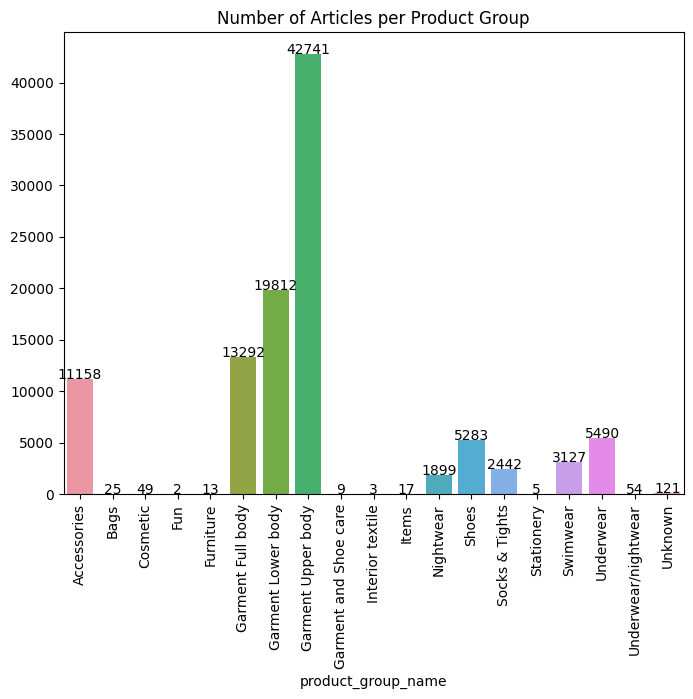

In [66]:
plt.figure(figsize = (8,6))
plt.title('Number of Articles per Product Group')
sns.barplot(x = articles_product_grp_art.index, y= articles_product_grp_art.values)
plt.xticks(rotation=90)
# Add count labels on top of each bar
for i, value in enumerate(articles_product_grp_art.values):
    plt.text(i, value + 1, f'{int(value)}', ha='center')  # Adjust '0.1' for spacing as needed
plt.show()

In [67]:
for col in articles_df.columns:
    print(f"Unique values in {col} is {articles_df[col].nunique()}")    

Unique values in article_id is 105542
Unique values in product_code is 47224
Unique values in prod_name is 45875
Unique values in product_type_no is 132
Unique values in product_type_name is 131
Unique values in product_group_name is 19
Unique values in graphical_appearance_no is 30
Unique values in graphical_appearance_name is 30
Unique values in colour_group_code is 50
Unique values in colour_group_name is 50
Unique values in perceived_colour_value_id is 8
Unique values in perceived_colour_value_name is 8
Unique values in perceived_colour_master_id is 20
Unique values in perceived_colour_master_name is 20
Unique values in department_no is 299
Unique values in department_name is 250
Unique values in index_code is 10
Unique values in index_name is 10
Unique values in index_group_no is 5
Unique values in index_group_name is 5
Unique values in section_no is 57
Unique values in section_name is 56
Unique values in garment_group_no is 21
Unique values in garment_group_name is 21
Unique valu

# Baseline Model

## Approach 1:
We will consider only transaction data and age group column from customer data and try to recommend articles based on top 10 transactions of that particular age group. We will then try to imrpove this model.

In [155]:
# As we dont use all columns of customer dataframe, we will create another dataframe with customerid and age groups columns
Cust_relavent_info = customers_df[['customer_id','age_0-20','age_20-40', 'age_40-60', 'age_60-80','age_80-100']]
Cust_relavent_info.head()

,customer_id,age_0-20,age_20-40,age_40-60,age_60-80,age_80-100
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,False,False,True,False,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,False,True,False,False,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,False,True,False,False,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,False,False,True,False,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,False,False,True,False,False


In [69]:
#similarly for our baseline we only need t_dat, article_id, customer_id from transactions dataframe
trans_relavent_info = transactions_train_df[['t_dat','customer_id','article_id']]
trans_relavent_info.head()

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004


In [156]:
#Now we join transactions data with cust_relavent_info using customer_id column
merged_df = trans_relavent_info.merge(Cust_relavent_info, on = "customer_id", how = "inner")
merged_df.head()

,t_dat,customer_id,article_id,age_0-20,age_20-40,age_40-60,age_60-80,age_80-100
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,False,True,False,False,False
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,False,True,False,False,False
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,False,True,False,False,False
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,False,True,False,False,False
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,False,True,False,False,False


In [180]:
#lets write a function to filter this merged_df as per the age group and calculate the most popular articles for that age group and recommend them
def recommend_baseline (merged_df, age_group, N):
    age_group_df = merged_df[merged_df[age_group] == True]
    
    #count transactions for each article_id
    trans_counts = age_group_df["article_id"].value_counts().reset_index()
    trans_counts.columns = ['article_id', 'transaction_count']
    
    #sort by transaction count to find popular articles
    popular_articles = trans_counts.sort_values(by = "transaction_count", ascending=False)
    
    #Recommend top N articles
    top_n_articles = popular_articles.head(N)
    print(f"top {N} articles for {age_group} is:")
    print(top_n_articles)
    #top_n_articles_df = articles_df[articles_df['article_id'].isin(top_n_articles['article_id'])]
    #top_n_prod_names = top_n_articles_df['prod_name'].reset_index(drop=True)
    
    #print(f"top {N} products for {age_group} is:")
    #print(top_n_prod_names)
    
    return top_n_articles

In [181]:
recommend_age_0_20 = recommend_baseline( merged_df,"age_0-20",10)

top 10 articles for age_0-20 is:
   article_id  transaction_count
0   706016001               2245
1   759871002               2182
2   706016002               1911
3   759871001               1007
4   464297007                988
5   372860002                944
6   673396002                937
7   720125001                864
8   759465001                862
9   733749001                855


In [182]:
recommend_age_20_40 = recommend_baseline( merged_df,"age_20-40",10)

top 10 articles for age_20-40 is:
   article_id  transaction_count
0   706016001              28771
1   706016002              19505
2   372860001              19475
3   610776002              16471
4   759871002              16405
5   464297007              16360
6   372860002              13377
7   156231001              13192
8   399223001              12985
9   720125001              12773


In [183]:
recommend_age_40_60 = recommend_baseline( merged_df,"age_40-60",10)

top 10 articles for age_40-60 is:
   article_id  transaction_count
0   706016001              10880
1   706016002               8771
2   372860001               8476
3   372860002               7681
4   568601006               7342
5   610776002               7114
6   673677002               6815
7   399256001               6727
8   579541001               6581
9   751471001               6122


In [184]:
recommend_age_40_60 = recommend_baseline( merged_df,"age_60-80",10)

top 10 articles for age_60-80 is:
   article_id  transaction_count
0   579541001               1653
1   399256005               1391
2   399256001               1196
3   678942001               1117
4   673677002               1097
5   610776002               1092
6   610776001               1018
7   796210010                941
8   573716012                925
9   783346001                923


In [185]:
recommend_age_80_100 = recommend_baseline( merged_df,"age_80-100",10)

top 10 articles for age_80-100 is:
   article_id  transaction_count
0   591334019                 15
2   673677004                 15
1   399256005                 15
3   751471001                 14
4   695632002                 14
5   690936006                 13
6   610776001                 13
7   661794001                 12
8   399256001                 12
9   562245018                 12


# Approach 2:

In [59]:
merged_cust_trans = cust_df.merge(transactions_train_df, on = "customer_id", how = "inner")
merged_cust_trans.head()

,customer_id,age,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60,2018-12-27,625548001,0.044051,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60,2018-12-27,176209023,0.035576,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60,2018-12-27,627759010,0.030492,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60,2019-05-02,697138006,0.010153,2
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,40-60,2019-05-25,568601006,0.050831,2


In [60]:
transactions_train_df.shape

(31788324, 5)

In [61]:
merged_cust_trans.shape

(31788324, 6)

In [76]:
agg_merged = merged_cust_trans.groupby(["age","article_id"]).agg(article_count = ("article_id","count")).sort_values(by = ["age", "article_count"], ascending = False).reset_index()
agg_merged.head()

/tmp/ipykernel_30/101459211.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_merged = merged_cust_trans.groupby(["age","article_id"]).agg(article_count = ("article_id","count")).sort_values(by = ["age", "article_count"], ascending = False).reset_index()


,age,article_id,article_count
0,80-100,595696024,25
1,80-100,743113003,21
2,80-100,610776001,18
3,80-100,673677004,18
4,80-100,523150002,17


In [77]:
agg_merged['rank'] = agg_merged.groupby('age')['article_count'].rank(ascending = False, method = "first")
agg_merged = agg_merged[agg_merged['rank']<=12]
agg_merged

/tmp/ipykernel_30/3775078879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_merged['rank'] = agg_merged.groupby('age')['article_count'].rank(ascending = False, method = "first")


,age,article_id,article_count,rank
0,80-100,595696024,25,1.0
1,80-100,743113003,21,2.0
2,80-100,610776001,18,3.0
3,80-100,673677004,18,4.0
4,80-100,523150002,17,5.0
5,80-100,806388002,17,6.0
6,80-100,399256005,16,7.0
7,80-100,695632002,16,8.0
8,80-100,537346026,15,9.0
9,80-100,591334019,15,10.0


In [78]:
#now weare combining customer_id with agg_merged based on their age to recommend them top 12 articles
results_df = cust_df.merge(agg_merged, on = ["age"], how = 'left')

In [79]:
results_df[results_df["customer_id"]=='00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75']

,customer_id,age,article_id,article_count,rank
156,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,706016001,12959,1.0
157,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,706016002,10053,2.0
158,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,372860001,9260,3.0
159,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,610776002,8686,4.0
160,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,372860002,8507,5.0
161,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,568601006,8411,6.0
162,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,399256001,7664,7.0
163,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,673677002,7301,8.0
164,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,751471001,7078,9.0
165,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,40-60,579541001,7007,10.0


# Submission

Lets see how the sample submission file looks like

In [80]:
sample_submission_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/sample_submission.csv")
sample_submission_df

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [186]:
sample_submission_df.dtypes

customer_id    object
prediction     object
dtype: object

In [81]:
results_df["customer_id"].nunique()

1371980

In [82]:
results_df[["customer_id", "article_id"]] = results_df[["customer_id", "article_id"]]
results_df

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,706016001
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,706016002
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,372860001
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,610776002
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,372860002
...,...,...
16463755,ffffd9ac14e89946416d80e791d064701994755c3ab686...,796210010
16463756,ffffd9ac14e89946416d80e791d064701994755c3ab686...,573716012
16463757,ffffd9ac14e89946416d80e791d064701994755c3ab686...,783346001
16463758,ffffd9ac14e89946416d80e791d064701994755c3ab686...,572797002


In [83]:
submission = results_df.groupby("customer_id")["article_id"].agg(lambda x:''.join(x.astype(str))).reset_index()
submission

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,7060160017060160023728600016107760023728600025...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,7060160017060160023728600016107760024642970077...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7060160017060160023728600016107760024642970077...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,7060160017060160023728600016107760023728600025...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,7060160017060160023728600016107760023728600025...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,7060160017060160023728600016107760024642970077...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,7060160017060160023728600016107760024642970077...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,7060160017060160023728600016107760024642970077...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7060160017598710027060160024642970077598710013...


In [87]:
submission = submission.rename(columns={"article_id" : "prediction"})
submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,7060160017060160023728600016107760023728600025...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,7060160017060160023728600016107760024642970077...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7060160017060160023728600016107760024642970077...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,7060160017060160023728600016107760023728600025...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,7060160017060160023728600016107760023728600025...


In [88]:
submission.to_csv("submission.csv", index=False)